In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import uproot

In [2]:
filename="/u/ki/nhartman/gpfs/diHiggs4b/data/data_16_PFlow-MAY2019-5jets/df_f_0.22_NNT_HCs.h5"
data16 = pd.read_hdf(filename)

In [7]:
import os
os.sys.path.append('../../hh4b-background-estimation/Resolved/nn-reweighting-notebook/')

import plotting
import importlib
importlib.reload(plotting)

<module 'plotting' from '../../hh4b-background-estimation/Resolved/nn-reweighting-notebook/plotting.py'>

In [8]:
from numpy.random import seed
seed(42)
from tensorflow import set_random_seed
set_random_seed(24)

In [9]:
# data16 = tree.pandas.df()

In [10]:
ind2b = (data16.ntag == 2)# & data16.MDpT
ind4b = (data16.ntag > 3)# & data16.MDpT

In [11]:
import math
def angpi2(ang):
    if ang < math.pi*0.5:
        return ang
    else:
        return np.abs(math.pi*0.5 - ang)

vecangpi2 = np.vectorize(angpi2)

In [12]:
dmh1 = 120.0
dmh2 = 115.0

data16["phihh"] = vecangpi2 ( np.abs( np.arctan2( 1*(data16["m_h1"]-dmh1)/data16["m_h1"],               1*(data16["m_h2"]-dmh2)/data16["m_h2"] ) ) )
data16["rhh"] =             np.sqrt( np.power(    1*(data16["m_h1"]-dmh1)/data16["m_h1"],2) + np.power( 1*(data16["m_h2"]-dmh2)/data16["m_h2"], 2 ) )
data16["deta_hh"] = np.abs( data16.eta_h1 - data16.eta_h2 )

../../hh4b-background-estimation/Resolved/nn-reweighting-notebook/plotting.py:38: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if show: fig.show()


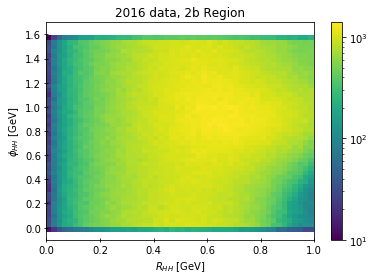

In [13]:
plotting.plotting2d("massplane_2b_rphi_pag.pdf", 
                    r"$R_{HH}$ [GeV]", r"$\phi_{HH}$ [GeV]", 
                    data16.rhh[ind2b], data16.phihh[ind2b], 
                    title='2016 data, 2b Region', 
                    binning=[ (50,50), ( (0, 1.0), (-0.1, 1.7) ) ], 
                    wgts=None, 
                    labels=None, 
                    norm=None, 
                    show=1)

In [45]:
indsr = (data16.rhh < 0.2)
indvr = (data16.rhh > 0.2) & (data16.rhh < 0.3)
indcr = (data16.rhh > 0.3) & (data16.rhh < 0.4)

In [46]:
to_log = [ 'pT_4', 'pT_4_log', 'pT_2', 'pT_2_log', 'dRjj_1', 'dRjj_2', 'pt_hh', 'phihh', 'deta_hh' ]

In [47]:
for tl in to_log:
    if str(tl+'_log') in data16.keys():
        print(tl, "already in dataset, skipping")
        continue
    data16[tl+'_log'] = np.log(data16[tl])
#     if 'pT_4' in tl:
#         data16[tl+'_log'] = np.log(data16[tl+'_log'])

pT_4 already in dataset, skipping
pT_4_log already in dataset, skipping
pT_2 already in dataset, skipping
pT_2_log already in dataset, skipping
dRjj_1 already in dataset, skipping
dRjj_2 already in dataset, skipping
pt_hh already in dataset, skipping
phihh already in dataset, skipping
deta_hh already in dataset, skipping


In [48]:
data16.keys()

Index(['run_number', 'event_number', 'mc_sf', 'ntag', 'njets',
       'kinematic_region', 'm_hh', 'pt_hh', 'X_wt', 'm_hh_cor', 'pT_h1',
       'eta_h1', 'phi_h1', 'm_h1', 'dRjj_h1', 'pT_h2', 'eta_h2', 'phi_h2',
       'm_h2', 'dRjj_h2', 'pT_2', 'pT_4', 'eta_i', 'dRjj_1', 'dRjj_2',
       'cosThetaStar', 'cosTheta1', 'cosTheta2', 'Phi', 'Phi1', 'HT', 'MDR',
       'MDpT', 'cut_deta_hh', 'cut_Xwt', 'phihh', 'rhh', 'deta_hh', 'pT_4_log',
       'pT_4_log_log', 'pT_2_log', 'pT_2_log_log', 'dRjj_1_log', 'dRjj_2_log',
       'pt_hh_log', 'phihh_log', 'deta_hh_log', 'njetsmax'],
      dtype='object')

In [49]:
max_njets = 3

In [50]:
data16['njetsmax'] = np.minimum( np.ones_like(data16['njets'])*max_njets, 
                                data16['njets']-4.0).astype(int)
print(data16.njetsmax.shape, data16.njets.shape)

(7496811,) (7496811,)


In [51]:
njets_embed = np.zeros( (data16['njetsmax'].shape[0], max_njets+1) )
for inj,nj in enumerate(data16['njetsmax']):
    njets_embed[inj,nj] = 1

In [52]:
sort_rw_cols = [
                'pT_4_log', 
                'pT_2_log', 
                'eta_i', 
                'dRjj_1', 
                'dRjj_2', 
#                 'njetsmax', 
                'pt_hh_log', 'phihh',
                'cosTheta1',
                'cosTheta2', 'deta_hh_log',
#     'MDpT'
                'X_wt'
#                 'Phi', 'Phi1'
#                'm_hh'
]

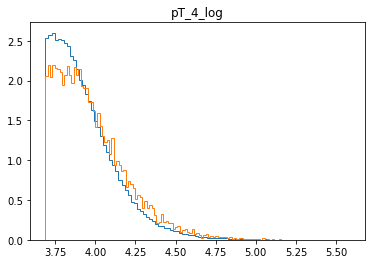

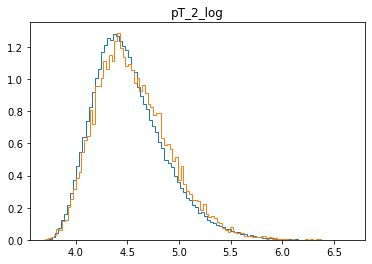

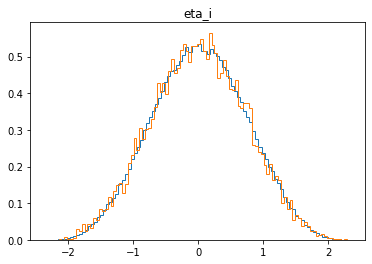

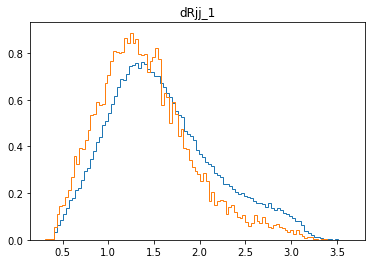

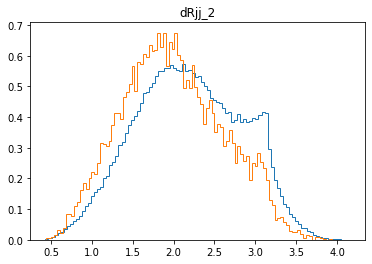

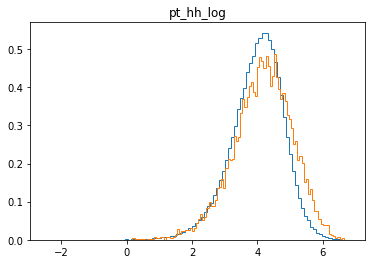

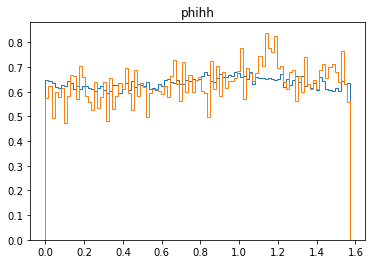

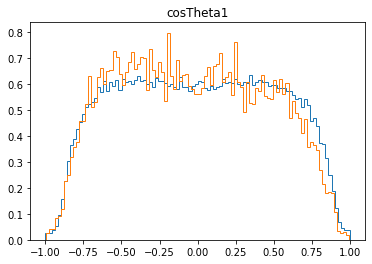

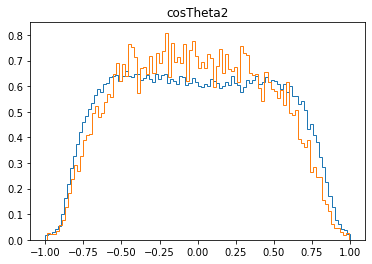

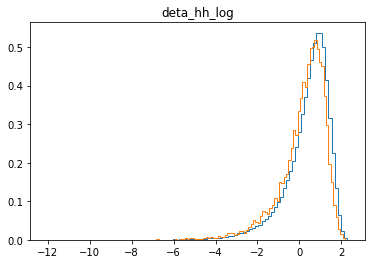

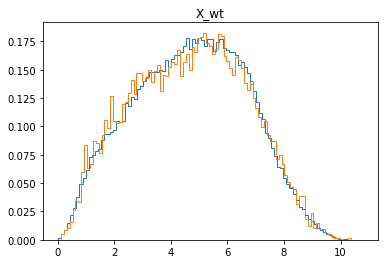

In [53]:
for rw in sort_rw_cols:
    plt.figure()
    plt.hist(data16[rw][ind2b & indcr], bins=100, density=1, histtype='step', label='2b cr')
    plt.hist(data16[rw][ind4b & indcr], bins=100, density=1, histtype='step', label='4b cr')
    plt.title(rw)
    plt.show()

In [54]:
original      = data16.loc[ind2b & indcr , sort_rw_cols]
original_m    = data16.loc[ind2b & indcr , "m_hh"]
original_mcor = data16.loc[ind2b & indcr , "m_hh_cor"]
original_embed = njets_embed[ind2b & indcr]

original_vr      = data16.loc[ind2b & indvr , sort_rw_cols]
original_vr_m    = data16.loc[ind2b & indvr , "m_hh"]
original_vr_mcor = data16.loc[ind2b & indvr , "m_hh_cor"]
original_vr_embed = njets_embed[ind2b & indvr]

target      =   data16.loc[ind4b & indcr , sort_rw_cols]
target_m    =   data16.loc[ind4b & indcr , "m_hh"]
target_mcor =   data16.loc[ind4b & indcr , "m_hh_cor"]
target_embed =   njets_embed[ind4b & indcr]

target_vr      =   data16.loc[ind4b & indvr , sort_rw_cols]
target_vr_m    =   data16.loc[ind4b & indvr , "m_hh"]
target_vr_mcor =   data16.loc[ind4b & indvr , "m_hh_cor"]
target_vr_embed =   njets_embed[ind4b & indvr ]

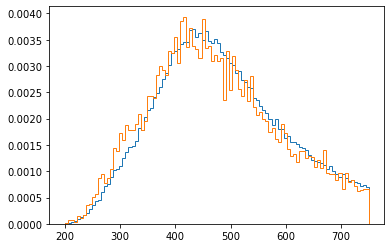

In [55]:
plt.figure()
plt.hist(original_m, bins=100, histtype='step', range=(200,750), density=1, label='original')
plt.hist(target_m, bins=100, histtype='step', range=(200,750), density=1, label='target')
plt.show()

In [56]:
X_all = pd.concat((original, target), ignore_index=True).values
Emb_all = np.concatenate((original_embed, target_embed))

Y_all = []
for _df, ID in [(original,1), (target, 0)]:
    Y_all.extend([ID] * _df.shape[0])
Y_all = np.array(Y_all)

In [57]:
print('split')

from sklearn.model_selection import train_test_split

ix = range(X_all.shape[0]) # array of indices, just to keep track of them for safety reasons and future checks
X_train, X_test, Y_train, Y_test, ix_train, ix_test, Emb_train, Emb_test = train_test_split(
    X_all, Y_all, ix, Emb_all, train_size=0.99)

split


In [58]:
print('scale')
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

scale


In [59]:
import keras.backend as K

In [60]:
def louppe_loss(y_true, y_pred):
    # Our loss
    return (y_true * (K.exp(0.5*y_pred)) + 
            (1.0 - y_true) * (K.exp(-1*0.5*y_pred)) )

In [61]:
from keras.models import Model
from keras.layers import Dense, Dropout, Input, concatenate, merge, Flatten, Embedding, BatchNormalization

In [62]:
feature_inputs = Input( shape=(X_all.shape[1],) )
njets_input    = Input( shape=(njets_embed.shape[1],), dtype='int32', name='njets_input')

njets_input_embed = Embedding(
            input_dim=njets_embed.shape[1], 
            output_dim=njets_embed.shape[1], 
#             mask_zero=True,
            input_length=njets_embed.shape[1])(njets_input)
njets_input_flat = Flatten()(njets_input_embed)
# print(njets_input)

inputs = concatenate([feature_inputs, njets_input_flat])

hidden = Dense(100, activation='relu')(inputs)
# hidden = BatchNormalization()(hidden)
hidden = Dense(50, activation='relu')(hidden)
# hidden = BatchNormalization()(hidden)
hidden = Dense(50, activation='relu')(hidden)
# hidden = BatchNormalization()(hidden)
hidden = Dense(50, activation='relu')(hidden)
# hidden = BatchNormalization()(hidden)
outputs = Dense(1, activation='linear')(hidden)

model = Model([feature_inputs,njets_input] , outputs)

In [63]:
from keras.optimizers import Adam

adm = Adam(amsgrad=True)

In [64]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [65]:
model.compile(loss=louppe_loss, optimizer=adm)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
njets_input (InputLayer)        (None, 4)            0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 4, 4)         16          njets_input[0][0]                
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 11)           0                                            
__________________________________________________________________________________________________
flatten_2 (Flatten)             (None, 16)           0           embedding_2[0][0]                
__________________________________________________________________________________________________
concatenat

In [66]:
history = model.fit([X_train, Emb_train], Y_train,
                        callbacks = [
                                EarlyStopping(monitor='val_loss', 
                                              patience=10, verbose=True),
                                ModelCheckpoint('current_model_rphi_pairagraph_embed.h5', 
                                                monitor='val_loss', 
                                                verbose=True, 
                                                save_best_only=True) ],
                        epochs=100,
                        validation_split = 0.2,
                        batch_size=256,
                       )

Train on 154831 samples, validate on 38708 samples
Epoch 1/100
154831/154831 [==============================] - 8s 53us/step - loss: 0.4934 - val_loss: 0.4873

Epoch 00001: val_loss improved from inf to 0.48730, saving model to current_model_rphi_pairagraph_embed.h5
Epoch 2/100
154831/154831 [==============================] - 7s 44us/step - loss: 0.4765 - val_loss: 0.4838

Epoch 00002: val_loss improved from 0.48730 to 0.48382, saving model to current_model_rphi_pairagraph_embed.h5
Epoch 3/100
154831/154831 [==============================] - 7s 42us/step - loss: 0.4748 - val_loss: 0.4826

Epoch 00003: val_loss improved from 0.48382 to 0.48261, saving model to current_model_rphi_pairagraph_embed.h5
Epoch 4/100
154831/154831 [==============================] - 7s 44us/step - loss: 0.4733 - val_loss: 0.4837

Epoch 00004: val_loss did not improve from 0.48261
Epoch 5/100
154831/154831 [==============================] - 7s 47us/step - loss: 0.4722 - val_loss: 0.4825

Epoch 00005: val_loss im

In [67]:
model.load_weights('current_model_rphi_pairagraph_embed.h5')

In [68]:
yhat_orig = model.predict( [scaler.transform(original.values),original_embed], batch_size=1024 )
# yhat_targ = model.predict( scaler.transform(target.values), batch_size=1024 )

In [69]:
yhat_orig_vr = model.predict( [scaler.transform(original_vr.values),original_vr_embed], batch_size=1024 )
# yhat_targ_vr = model.predict( scaler.transform(target_vr.values), batch_size=1024 )

(12743,) (12743,)
(182751,) (182751,)
(182751,) (182751,)


../../hh4b-background-estimation/Resolved/nn-reweighting-notebook/plotting.py:9: RuntimeWarning: invalid value encountered in true_divide
  return np.sum(np.where(p != 0, p * np.log(p / q), 0))
../../hh4b-background-estimation/Resolved/nn-reweighting-notebook/plotting.py:9: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.where(p != 0, p * np.log(p / q), 0))
../../hh4b-background-estimation/Resolved/nn-reweighting-notebook/plotting.py:9: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.where(p != 0, p * np.log(p / q), 0))


(12743,) (12743,)
(182751,) (182751,)
(182751,) (182751,)


../../hh4b-background-estimation/Resolved/nn-reweighting-notebook/plotting.py:9: RuntimeWarning: invalid value encountered in true_divide
  return np.sum(np.where(p != 0, p * np.log(p / q), 0))
../../hh4b-background-estimation/Resolved/nn-reweighting-notebook/plotting.py:9: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.where(p != 0, p * np.log(p / q), 0))
../../hh4b-background-estimation/Resolved/nn-reweighting-notebook/plotting.py:9: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.where(p != 0, p * np.log(p / q), 0))


(12743,) (12743,)
(182751,) (182751,)
(182751,) (182751,)


../../hh4b-background-estimation/Resolved/nn-reweighting-notebook/plotting.py:9: RuntimeWarning: invalid value encountered in true_divide
  return np.sum(np.where(p != 0, p * np.log(p / q), 0))
../../hh4b-background-estimation/Resolved/nn-reweighting-notebook/plotting.py:9: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.where(p != 0, p * np.log(p / q), 0))
../../hh4b-background-estimation/Resolved/nn-reweighting-notebook/plotting.py:9: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.where(p != 0, p * np.log(p / q), 0))


(12743,) (12743,)
(182751,) (182751,)
(182751,) (182751,)


../../hh4b-background-estimation/Resolved/nn-reweighting-notebook/plotting.py:9: RuntimeWarning: invalid value encountered in true_divide
  return np.sum(np.where(p != 0, p * np.log(p / q), 0))
../../hh4b-background-estimation/Resolved/nn-reweighting-notebook/plotting.py:9: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.where(p != 0, p * np.log(p / q), 0))
../../hh4b-background-estimation/Resolved/nn-reweighting-notebook/plotting.py:9: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.where(p != 0, p * np.log(p / q), 0))


(12743,) (12743,)
(182751,) (182751,)
(182751,) (182751,)


../../hh4b-background-estimation/Resolved/nn-reweighting-notebook/plotting.py:9: RuntimeWarning: invalid value encountered in true_divide
  return np.sum(np.where(p != 0, p * np.log(p / q), 0))
../../hh4b-background-estimation/Resolved/nn-reweighting-notebook/plotting.py:9: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.where(p != 0, p * np.log(p / q), 0))
../../hh4b-background-estimation/Resolved/nn-reweighting-notebook/plotting.py:9: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.where(p != 0, p * np.log(p / q), 0))


(12743,) (12743,)
(182751,) (182751,)
(182751,) (182751,)


../../hh4b-background-estimation/Resolved/nn-reweighting-notebook/plotting.py:9: RuntimeWarning: invalid value encountered in true_divide
  return np.sum(np.where(p != 0, p * np.log(p / q), 0))
../../hh4b-background-estimation/Resolved/nn-reweighting-notebook/plotting.py:9: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.where(p != 0, p * np.log(p / q), 0))
../../hh4b-background-estimation/Resolved/nn-reweighting-notebook/plotting.py:9: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.where(p != 0, p * np.log(p / q), 0))


(12743,) (12743,)
(182751,) (182751,)
(182751,) (182751,)


../../hh4b-background-estimation/Resolved/nn-reweighting-notebook/plotting.py:9: RuntimeWarning: invalid value encountered in true_divide
  return np.sum(np.where(p != 0, p * np.log(p / q), 0))


(12743,) (12743,)
(182751,) (182751,)
(182751,) (182751,)


../../hh4b-background-estimation/Resolved/nn-reweighting-notebook/plotting.py:9: RuntimeWarning: invalid value encountered in true_divide
  return np.sum(np.where(p != 0, p * np.log(p / q), 0))


(12743,) (12743,)
(182751,) (182751,)
(182751,) (182751,)


../../hh4b-background-estimation/Resolved/nn-reweighting-notebook/plotting.py:9: RuntimeWarning: invalid value encountered in true_divide
  return np.sum(np.where(p != 0, p * np.log(p / q), 0))


(12743,) (12743,)
(182751,) (182751,)
(182751,) (182751,)


../../hh4b-background-estimation/Resolved/nn-reweighting-notebook/plotting.py:9: RuntimeWarning: invalid value encountered in true_divide
  return np.sum(np.where(p != 0, p * np.log(p / q), 0))
../../hh4b-background-estimation/Resolved/nn-reweighting-notebook/plotting.py:9: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.where(p != 0, p * np.log(p / q), 0))
../../hh4b-background-estimation/Resolved/nn-reweighting-notebook/plotting.py:9: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.where(p != 0, p * np.log(p / q), 0))


(12743,) (12743,)
(182751,) (182751,)
(182751,) (182751,)


../../hh4b-background-estimation/Resolved/nn-reweighting-notebook/plotting.py:9: RuntimeWarning: invalid value encountered in true_divide
  return np.sum(np.where(p != 0, p * np.log(p / q), 0))
../../hh4b-background-estimation/Resolved/nn-reweighting-notebook/plotting.py:9: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.where(p != 0, p * np.log(p / q), 0))
../../hh4b-background-estimation/Resolved/nn-reweighting-notebook/plotting.py:9: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.where(p != 0, p * np.log(p / q), 0))


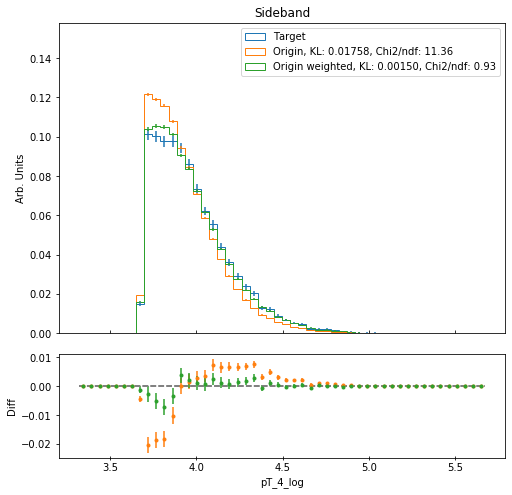

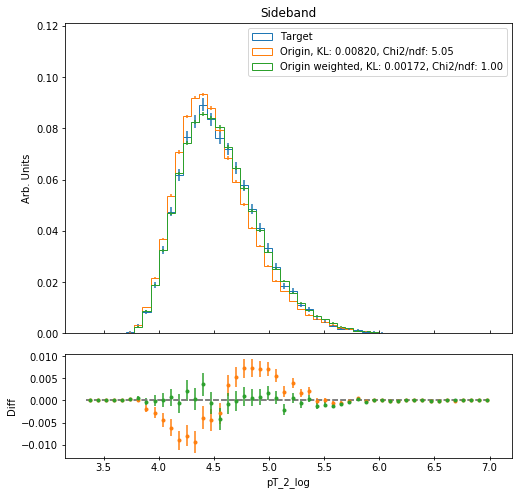

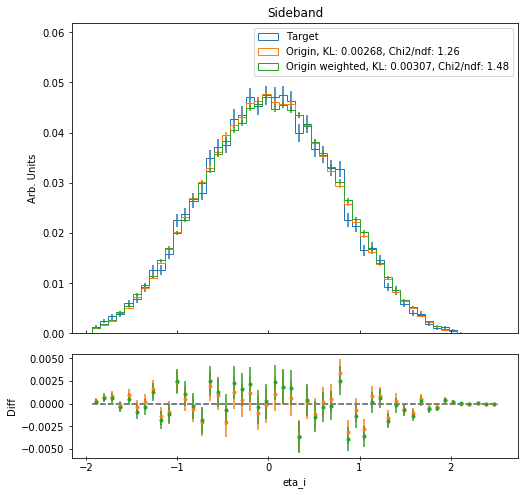

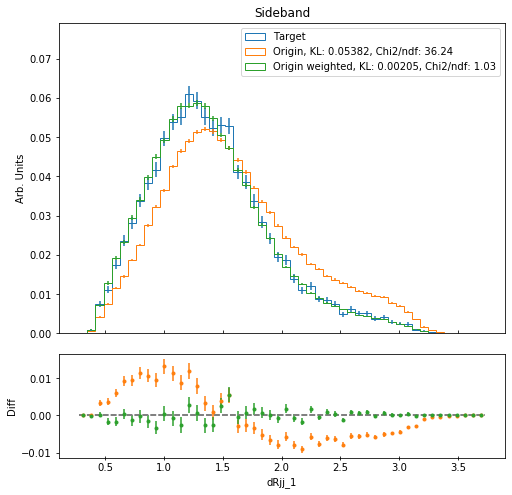

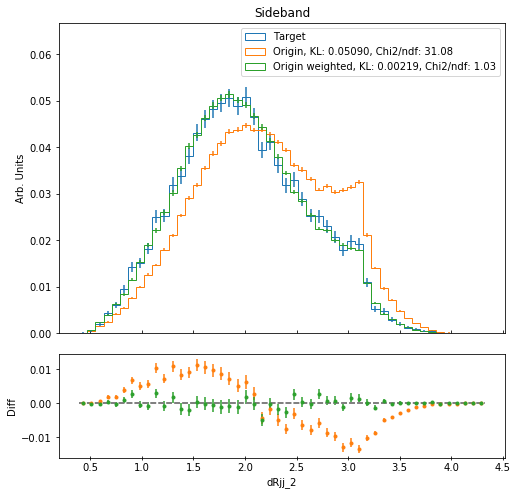

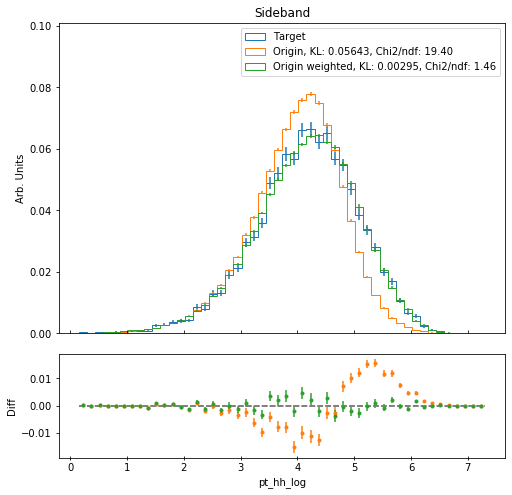

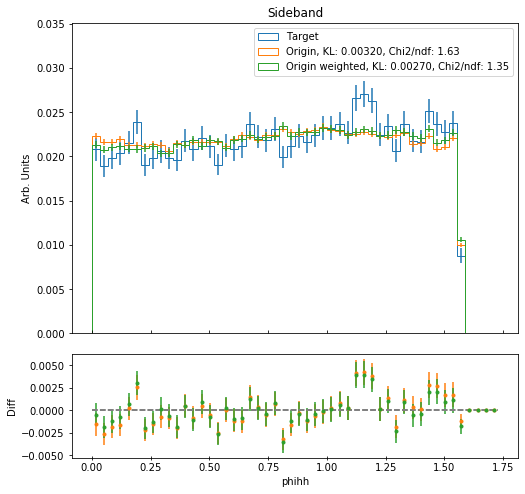

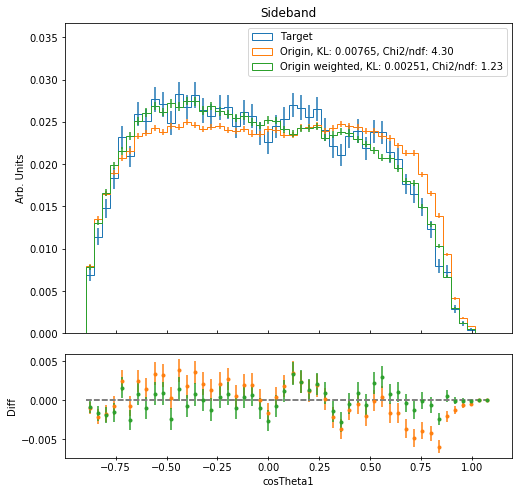

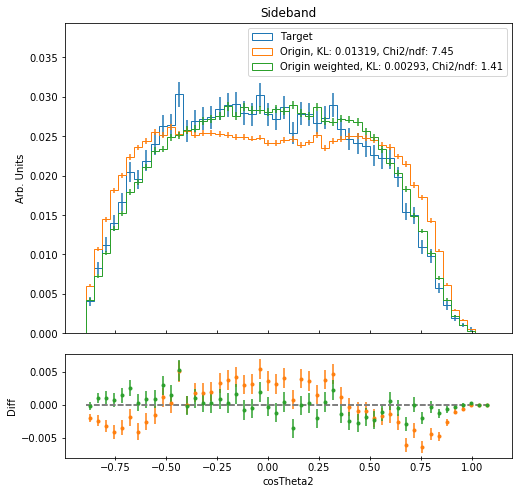

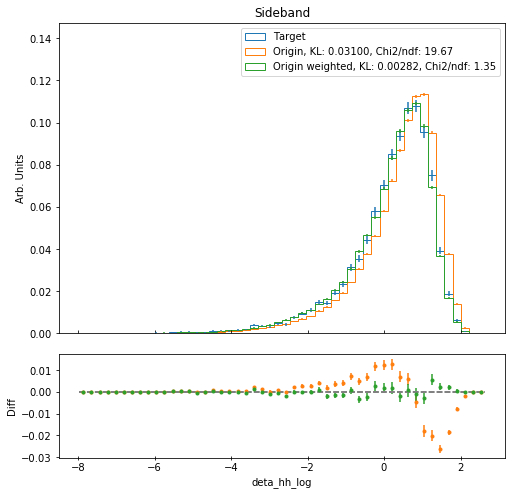

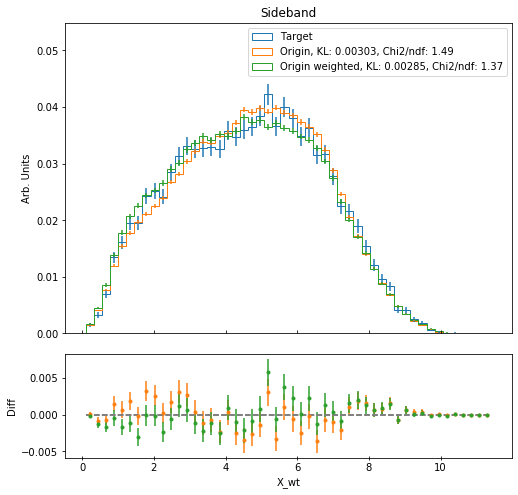

In [70]:
for rw in sort_rw_cols:
    kls = plotting.ratio_plot(ff=f'{rw}_rphi_pag.pdf', xlabel=rw, title='Sideband',
          xarrs=[target[rw], 
                 original[rw], 
                 original[rw]],
          wgts=[np.ones_like(target[rw]), 
                np.ones_like(original[rw]), 
                np.exp(yhat_orig.flatten())
               ],
          labels=['Target', 
                  'Origin', 
                  'Origin weighted'],
          binning=[50,min(target[rw])*0.9,max(target[rw])*1.1], norm=1, show=0)
#     break

(12743,) (12743,)
(182751,) (182751,)
(182751,) (182751,)


../../hh4b-background-estimation/Resolved/nn-reweighting-notebook/plotting.py:9: RuntimeWarning: invalid value encountered in true_divide
  return np.sum(np.where(p != 0, p * np.log(p / q), 0))


[0.0, 0.007634422738869584, 0.002648771333992197]

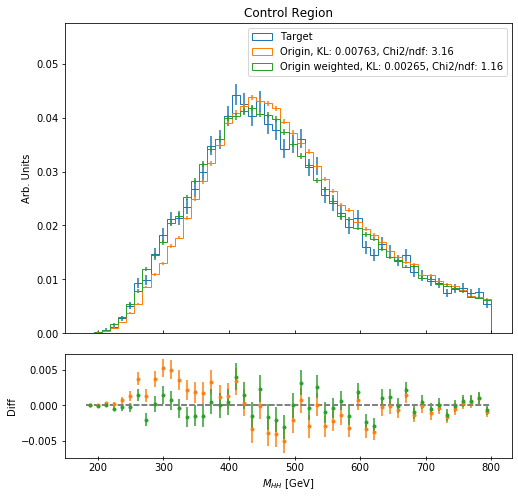

In [71]:
plotting.ratio_plot(ff=f'm_rphi_pag.pdf', xlabel=r"$M_{HH}$ [GeV]", title='Control Region',
          xarrs=[target_m, 
                 original_m, 
                 original_m],
          wgts=[np.ones_like(target_m), 
                np.ones_like(original_m), 
                np.exp(yhat_orig.flatten())
               ],
          labels=['Target', 
                  'Origin', 
                  'Origin weighted'],
          binning=[50,min(target_m)*0.9,800], norm=1, show=0)

(10031,) (10031,)
(136405,) (136405,)
(136405,) (136405,)


../../hh4b-background-estimation/Resolved/nn-reweighting-notebook/plotting.py:9: RuntimeWarning: invalid value encountered in true_divide
  return np.sum(np.where(p != 0, p * np.log(p / q), 0))
../../hh4b-background-estimation/Resolved/nn-reweighting-notebook/plotting.py:9: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.where(p != 0, p * np.log(p / q), 0))
../../hh4b-background-estimation/Resolved/nn-reweighting-notebook/plotting.py:9: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.where(p != 0, p * np.log(p / q), 0))


[0.0, 0.006716406560268086, 0.004203669276581967]

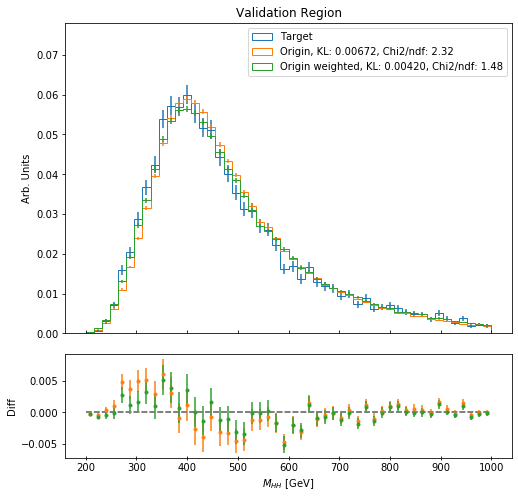

In [72]:
plotting.ratio_plot(ff=f'm_rphi_vr_pag.pdf', xlabel=r"$M_{HH}$ [GeV]", title='Validation Region',
          xarrs=[target_vr_m, 
                 original_vr_m, 
                 original_vr_m],
          wgts=[np.ones_like(target_vr_m), 
                np.ones_like(original_vr_m), 
                np.exp(yhat_orig_vr.flatten())
               ],
          labels=['Target', 
                  'Origin', 
                  'Origin weighted'],
          binning=[50,min(target_vr_m)*0.9,1000], norm=1, show=0)

In [76]:
vr2b      = data16.loc[ind2b & indvr , sort_rw_cols]
vr2b_m    = data16.loc[ind2b & indvr , "m_hh"]
vr2b_mcor = data16.loc[ind2b & indvr , "m_hh_cor"]
vr2b_embed = njets_embed[ind2b & indvr]

vr4b   = data16.loc[ind4b & indvr , sort_rw_cols]
vr4b_m = data16.loc[ind4b & indvr , "m_hh"]
vr4b_mcor = data16.loc[ind4b & indvr , "m_hh_cor"]
vr4b_embed = njets_embed[ind4b & indvr]

In [77]:
yhat_vr2b = model.predict( [scaler.transform(vr2b.values), vr2b_embed], batch_size=1024 )

(10031,) (10031,)
(136405,) (136405,)
(136405,) (136405,)


../../hh4b-background-estimation/Resolved/nn-reweighting-notebook/plotting.py:9: RuntimeWarning: invalid value encountered in true_divide
  return np.sum(np.where(p != 0, p * np.log(p / q), 0))
../../hh4b-background-estimation/Resolved/nn-reweighting-notebook/plotting.py:9: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.where(p != 0, p * np.log(p / q), 0))
../../hh4b-background-estimation/Resolved/nn-reweighting-notebook/plotting.py:9: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.where(p != 0, p * np.log(p / q), 0))


[0.0, 0.006803183244907657, 0.004734487519254298]

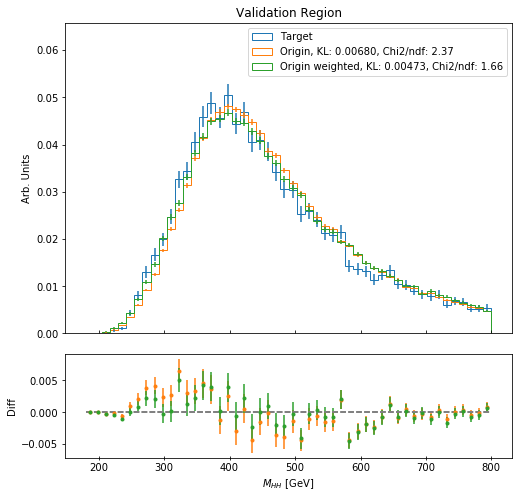

In [78]:
plotting.ratio_plot(ff=f'test_shutup_pag.pdf', xlabel=r"$M_{HH}$ [GeV]", title='Validation Region',
          xarrs=[vr4b_m, 
                 vr2b_m, 
                 vr2b_m],
          wgts=[np.ones_like(vr4b_m), 
                np.ones_like(vr2b_m), 
                np.exp(yhat_vr2b.flatten())
               ],
          labels=['Target', 
                  'Origin', 
                  'Origin weighted'],
          binning=[50,200*0.9,800], norm=1, show=0)

In [73]:
sr2b      = data16.loc[ind2b & indsr , sort_rw_cols]
sr2b_m    = data16.loc[ind2b & indsr , "m_hh"]
sr2b_mcor = data16.loc[ind2b & indsr , "m_hh_cor"]
sr2b_embed = njets_embed[ind2b & indsr]

sr4b   = data16.loc[ind4b & indsr , sort_rw_cols]
sr4b_m = data16.loc[ind4b & indsr , "m_hh"]
sr4b_mcor = data16.loc[ind4b & indsr , "m_hh_cor"]
sr4b_embed = njets_embed[ind4b & indsr]

In [74]:
yhat_sr2b = model.predict( [scaler.transform(sr2b.values), sr2b_embed], batch_size=1024 )

(8613,) (8613,)
(115142,) (115142,)
(115142,) (115142,)


../../hh4b-background-estimation/Resolved/nn-reweighting-notebook/plotting.py:9: RuntimeWarning: invalid value encountered in true_divide
  return np.sum(np.where(p != 0, p * np.log(p / q), 0))
../../hh4b-background-estimation/Resolved/nn-reweighting-notebook/plotting.py:9: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.where(p != 0, p * np.log(p / q), 0))
../../hh4b-background-estimation/Resolved/nn-reweighting-notebook/plotting.py:9: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.where(p != 0, p * np.log(p / q), 0))


[0.0, 0.0043708611220989995, 0.0060966928149115834]

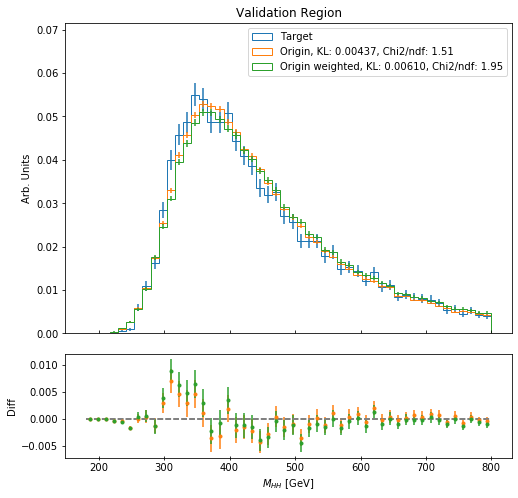

In [75]:
plotting.ratio_plot(ff=f'test_shutup_pag.pdf', xlabel=r"$M_{HH}$ [GeV]", title='Signal Region',
          xarrs=[sr4b_m, 
                 sr2b_m, 
                 sr2b_m],
          wgts=[np.ones_like(sr4b_m), 
                np.ones_like(sr2b_m), 
                np.exp(yhat_sr2b.flatten())
               ],
          labels=['Target', 
                  'Origin', 
                  'Origin weighted'],
          binning=[50,200*0.9,800], norm=1, show=0)